<a href="https://colab.research.google.com/github/Vijaypurushoth988373/DW12_task_6/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
# Getting some Statistical Measure about the data
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [5]:
# No of Rows and Columns in the Data Frame
df.shape

(804, 12)

In [6]:
# Checking if there is any null values present or not
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [18]:
df['Leather'].value_counts()

1    582
0    222
Name: Leather, dtype: int64

In [17]:
df['Sound'].value_counts()

1    546
0    258
Name: Sound, dtype: int64

In [16]:
df['Cruise'].value_counts()

1    605
0    199
Name: Cruise, dtype: int64

In [15]:
df['Doors'].value_counts()

4    614
2    190
Name: Doors, dtype: int64

In [13]:
df['Cylinder'].value_counts()

4    394
6    310
8    100
Name: Cylinder, dtype: int64

In [12]:
df['Type'].value_counts()

Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: Type, dtype: int64

In [9]:
# Distribution of Target Variable
df['Make'].value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

In [36]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [19]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


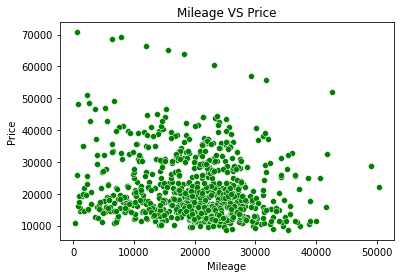

In [20]:
import seaborn as sns
sns.scatterplot(x='Mileage', y='Price', data=df, color='green')
plt.title('Mileage VS Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

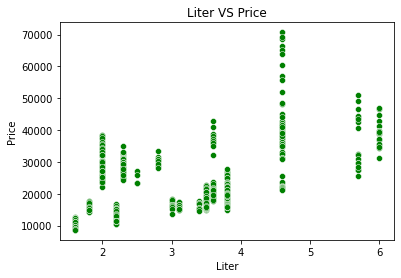

In [22]:
import seaborn as sns
sns.scatterplot(x='Liter', y='Price', data=df, color='green')
plt.title('Liter VS Price')
plt.xlabel('Liter')
plt.ylabel('Price')
plt.show()

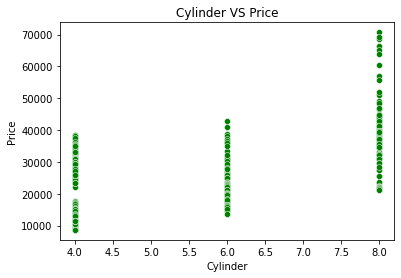

In [23]:
import seaborn as sns
sns.scatterplot(x='Cylinder', y='Price', data=df, color='green')
plt.title('Cylinder VS Price')
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.show()

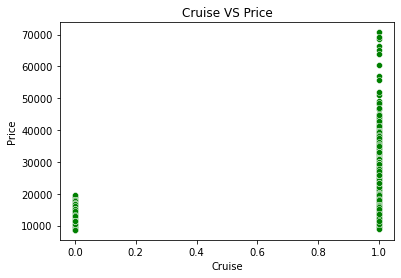

In [24]:
import seaborn as sns
sns.scatterplot(x='Cruise', y='Price', data=df, color='green')
plt.title('Cruise VS Price')
plt.xlabel('Cruise')
plt.ylabel('Price')
plt.show()

In [37]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Make']= label_encoder.fit_transform(df['Make'])

df['Make'].unique()

array([0, 1, 2, 3, 4, 5])

In [38]:
# Encode labels in column 'species'.
df['Model']= label_encoder.fit_transform(df['Model'])

df['Model'].unique()

array([10, 22, 23, 26,  7,  8, 14, 27, 28, 31,  5,  9, 11, 12, 13, 19, 24,
       25,  6, 15, 17, 18, 16, 29, 30,  1,  2,  3,  4,  0, 20, 21])

In [39]:
df['Trim']= label_encoder.fit_transform(df['Trim'])

df['Trim'].unique()

array([44,  7,  8,  9, 12, 32, 45, 13, 14, 20, 23, 25, 29, 31, 42, 43, 11,
       22, 26, 27, 10, 41, 24, 30, 36, 28, 40, 19, 38, 39, 16, 15, 18,  0,
       17, 46, 33, 34,  1,  2,  4,  5,  6, 35,  3, 37, 21])

In [40]:
df['Type']= label_encoder.fit_transform(df['Type'])

df['Type'].unique()

array([3, 0, 2, 1, 4])

In [41]:
X=df.drop(columns='Price',axis=1)
Y=df['Price']

In [42]:
X

,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,0,10,44,3,6,3.1,4,1,1,1
1,9135,0,10,44,3,6,3.1,4,1,1,0
2,13196,0,10,44,3,6,3.1,4,1,1,0
3,16342,0,10,44,3,6,3.1,4,1,0,0
4,19832,0,10,44,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
799,16229,5,21,21,3,6,3.0,4,1,0,0
800,19095,5,21,21,3,6,3.0,4,1,1,0
801,20484,5,21,21,3,6,3.0,4,1,1,0
802,25979,5,21,21,3,6,3.0,4,1,1,0


In [43]:
Y

0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
           ...     
799    16507.070267
800    16175.957604
801    15731.132897
802    15118.893228
803    13585.636802
Name: Price, Length: 804, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

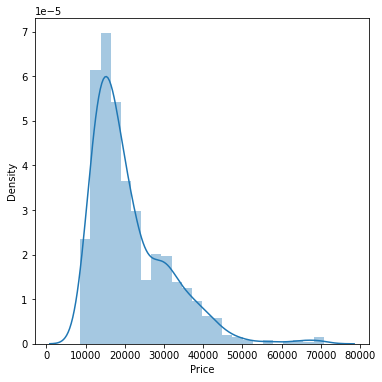

In [29]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.distplot(df['Price'])
plt.show

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [45]:
print(X_train.shape, X_test.shape)

(643, 11) (161, 11)


In [46]:
print(Y_train.shape, Y_test.shape)

(643,) (161,)


In [47]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [48]:
Y_pred=model.predict(X_test)

In [49]:
model.intercept_

3752.0186802833887

In [50]:
model.coef_

array([-1.80066761e-01,  7.54062036e+02, -1.72271182e+02, -7.93489869e+01,
        3.85570674e+02,  4.92324059e+03, -7.83303107e+02, -1.42020775e+03,
        4.67417244e+03, -1.57504988e+03,  3.01000126e+03])

In [51]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,Y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.43066857750515297


In [53]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred, 'Difference': Y_test - Y_pred})
df

,Actual,Predicted,Difference
8,14862.093870,24483.826368,-9621.732499
575,16256.236168,22058.741981,-5802.505814
616,15802.652861,9777.192223,6025.460638
142,45061.951935,31068.724194,13993.227741
236,12425.389171,14813.526250,-2388.137079
...,...,...,...
524,18548.978593,23128.724427,-4579.745835
116,36332.894685,35396.964226,935.930459
37,21683.031464,19563.799284,2119.232180
453,18040.144006,28902.668505,-10862.524498
